

# Logistic Regression - Project Telecom Churn Prediction


##  Bank Marketing


**Abstract:** 
- The data is related with Major Telecom company's customer churn.
- The classification goal is to predict if the client will churn __ customer churned or not (Yes or No) is (variable y)__.



**Data Set Information:**



| Tables        | Column Name                     | Description                                                   |
| ------------- |:-------------------------------:| -------------------------------------------------------------:|
| col0          |  CustomerID                     |Passenger Identity                                             |
| col1          |  Gender	                      |Whether the customer is a male or a female                     |
| col2          |  SeniorCitizen                  |Whether the customer is a senior citizen or not (1, 0)         |
| col3          |  Partner	                      |Whether the customer has a partner or not (Yes, No)            |
| Col4          |  Dependents                     |Whether the customer has dependents or not (Yes, No)           |
| Col5          |  Tenure                         |Number of months the customer has stayed with the company      |
| Col6          |  PhoneService                   |Whether the customer has a phone service or not (Yes, No)      |
| Col7          |  MultipleLines	              |Whether the customer has multiple lines or not                 |
|               |                                 |   (Yes, No, No phone service)                                 |
|Col8           |  InternetService	              |Customer’s internet service provider (DSL, Fiber optic, No)    |
|Col9           |  OnlineSecurity	              |Whether the customer has online security or not (Y,N,Ninternet)|
|Col10          |   OnlineBackup	              |Whether the customer has online backup or not (Y,N,Ninternet)  |
|Col11          | DeviceProtection	              |Whether the customer has device protection ornot(Y,N,Ninternet)|
|Col12          |TechSupport	                  |Whether the customer has tech support or not (Y,N,Ninternet)   |
|Col13          |StreamingTV	                  |Whether the customer has streaming TV or not(Y,N,Ninternet)    |
|Col14          |StreamingMovies	              |Whether the customer has streaming movies or not(Y,N,Ninternet)|
|Col15          | Contract	                      |The contract term of the customer (Month-to-month,1year,2year) |
|Col16          |PaperlessBilling	              |Whether the customer has paperless billing or not (Yes, No)    |
|Col17          |PaymentMethod	                  |The customer’s payment method (Electronic check, Mailed check  |
|               |                                 |    Bank transfer (automatic),  Credit card (automatic))       |
|Col18          |MonthlyCharges	                  |The amount charged to the customer monthly                     |
|Col19          |TotalCharges	                  |The total amount charged to the customer                       |
|Col20          |Churn	                          |Whether the customer churned or not (Yes or No)                |



### Import the dataset

- Use pandas library to read the csv format.

In [1]:
import pandas as pd
import numpy as np
Churn_train = pd.read_csv('Churn_train.csv')
Churn_test  = pd.read_csv('Churn_test.csv')
Churn_train.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


### Check the columns present in the dataset

In [2]:
Churn_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Check the shape of Dataset

In [3]:
print(Churn_train.shape)
print(Churn_test.shape)

(5634, 21)
(1409, 20)


In [4]:
print(Churn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:>

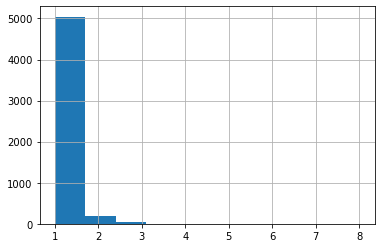

In [5]:
Churn_train['TotalCharges'].value_counts().hist()

In [6]:
#Churn_train['TotalCharges']= Churn_train.TotalCharges.convert_objects(convert_numeric=True)
Churn_train['TotalCharges'] = pd.to_numeric(Churn_train['TotalCharges'],errors = 'coerce')
Churn_test['TotalCharges'] = pd.to_numeric(Churn_test['TotalCharges'],errors = 'coerce')

In [7]:
Churn_train['TotalCharges']  = Churn_train['TotalCharges'].astype ('float64')
Churn_test['TotalCharges']  = Churn_test['TotalCharges'].astype ('float64')
#Churn_test['TotalCharges']  = Churn_test['TotalCharges'].astype ('float64')

In [8]:
Churn_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Check the descriptive statistics of the dataset

In [9]:
Churn_train.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5626.000000
mean,0.161874,32.277955,64.779127,2280.662380
std,0.368368,24.555211,30.104993,2266.394623
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,391.900000
50%,0.000000,29.000000,70.375000,1394.800000
75%,0.000000,55.000000,89.850000,3794.487500
max,1.000000,72.000000,118.650000,8684.800000


In [10]:
Churn_test.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1406.000000
mean,0.163236,32.743790,64.691980,2293.856437
std,0.369712,24.581736,30.040784,2269.054321
min,0.000000,0.000000,18.700000,19.200000
25%,0.000000,9.000000,36.850000,423.687500
50%,0.000000,29.000000,70.150000,1413.550000
75%,0.000000,56.000000,89.850000,3791.875000
max,1.000000,72.000000,118.750000,8672.450000


### Check the info of the dataset

In [11]:
print(Churn_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


### Q 1. Write a code to understand the below mentioned variables and print their 'unique' attributes.
``` [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',] ```


- Use the `.unique()` function.
- Print the values separately.

In [12]:
cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
def log():
    print('Gender these unique values:',Churn_train['gender'].value_counts())
    print('SeniorCitizen have these unique values:',Churn_train['SeniorCitizen'].value_counts())
    print(' Partner have these unique values:',Churn_train['Partner'].value_counts())
    print(' Dependents have these unique values:',Churn_train['Dependents'].value_counts())
   
    print('PhoneService have these unique values:',Churn_train['PhoneService'].value_counts())
    print(' MultipleLines have these unique values:',Churn_train['MultipleLines'].value_counts())
    print(' InternetService have these unique values:',Churn_train['InternetService'].value_counts())
    print('OnlineSecurity have these unique values:',Churn_train['OnlineSecurity'].value_counts())
    print('OnlineBackup have these unique values:',Churn_train['OnlineBackup'].value_counts())
    print('DeviceProtection have these unique values:',Churn_train['DeviceProtection'].value_counts())
    print('TechSupport have these unique values:',Churn_train['TechSupport'].value_counts())
    print('StreamingTV have these unique values:',Churn_train['StreamingTV'].value_counts())
    print('StreamingMovies have these unique values:',Churn_train['StreamingMovies'].value_counts())
    print('Contract have these unique values:',Churn_train['Contract'].value_counts())
    print('PaymentMethod have these unique values:',Churn_train['PaymentMethod'].value_counts())
    print('PaperlessBilling have these unique values:',Churn_train['PaperlessBilling'].value_counts())
    print('Churn these unique values:',Churn_train['Churn'].value_counts())
    
    
   # The code output should be user-friendly.
    # For eg- Job have these unique values: ['.........']
log()

Gender these unique values: Male      2838
Female    2796
Name: gender, dtype: int64
SeniorCitizen have these unique values: 0    4722
1     912
Name: SeniorCitizen, dtype: int64
 Partner have these unique values: No     2932
Yes    2702
Name: Partner, dtype: int64
 Dependents have these unique values: No     3968
Yes    1666
Name: Dependents, dtype: int64
PhoneService have these unique values: Yes    5087
No      547
Name: PhoneService, dtype: int64
 MultipleLines have these unique values: No                  2700
Yes                 2387
No phone service     547
Name: MultipleLines, dtype: int64
 InternetService have these unique values: Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64
OnlineSecurity have these unique values: No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64
OnlineBackup have these unique values: No                     2498
Yes                    1915
N

### Q 2. Write a code to check the min and max value of age. Also check if there is any null value or not.

- Use the `'.max()', '.min()', 'isnull()' and 'any()'` function

In [13]:
def log():
    print(Churn_train['tenure'].min())
    print(Churn_train['tenure'].max()) # print the max age
    # print the min age
    print(Churn_train.isnull().any() )                # print the missing values if any
log()

0
72
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [14]:
print(Churn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [15]:
Churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


<AxesSubplot:>

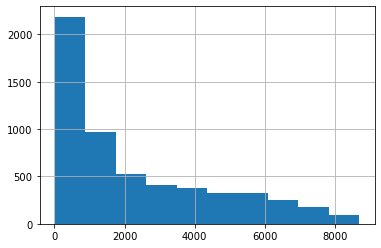

In [16]:
Churn_train['TotalCharges'].hist()

In [17]:
Churn_train['TotalCharges'].fillna(Churn_train['TotalCharges'].median(), inplace=True) 

In [18]:
Churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:>

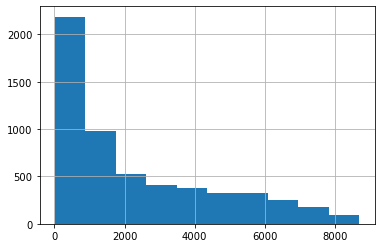

In [19]:
Churn_train['TotalCharges'].hist()

In [20]:
Churn_test['TotalCharges'].fillna(Churn_test['TotalCharges'].median(), inplace=True) 

In [21]:
Churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


<AxesSubplot:>

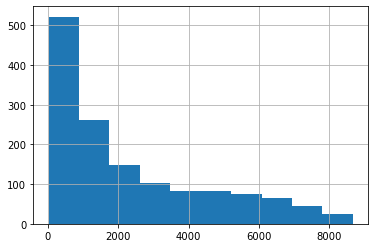

In [22]:
Churn_test['TotalCharges'].hist()

<AxesSubplot:>

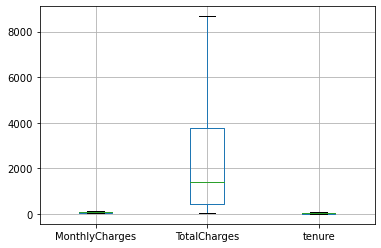

In [26]:
Churn_test.boxplot(column=['MonthlyCharges', 'TotalCharges', 'tenure'])

### Count of Yes and No for Churn

In [27]:
Churn_train['Churn'].value_counts() #we are using '.value_counts()' function which outputs the number of occurence of categories within a feature 
# to check balance in TV #It was 40% data in yes category, so balanced data

No     4113
Yes    1521
Name: Churn, dtype: int64

### Q 3. Write a user defined function to calculate the Inter quartile range for quantile values outside 25 to 75 range. And do the outlier capping for lower level with min value and for upper level with 'q3=1.5*iqr' value.

- Use the `.quantile()` function to extract the first and third quantile and save these values in different vatiables.
- Use the created variables in the formula provided above, this creates an upper bound.
- For lower bound use the `min()` function on the column name.

In [28]:
def remove_outlier(df_in, col_name):
    Q1=df_in[col_name].quantile(0.25)   # Calculate quantile 1 using quantile(0.25)
    Q3=df_in[col_name].quantile(0.75)    # Calculate quantile 3
    IQR = Q3-Q1            # Calculate IQR as difference of Quantile 3 and quantile 1
    lower_bound = df_in[col_name].min()          # Find the lower bound using the min() function
    upper_bound = Q3 + 1.5*IQR            # Find the upper bound as quantile3 + 1.5*IQR
    #print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    print(lower_bound, upper_bound)        # Print the lower and upper bound of the column
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]    # Remove the values lying outside min and upper bound range
    return df_out


### Q 3.1 Using the above created function , remove the outlier from 'MonthlyCharges' variables:

In [29]:
#def log(Churn_train):
    #return remove_outlier(Churn_train, 'MonthlyCharges') # your code to remove the outlier from age

#Churn_train=log(Churn_train)

### Q 3.2 Using the above created function , remove the outlier from 'TotalCharges' variables:

In [30]:
def log(Churn_train):
    return remove_outlier(Churn_train, 'TotalCharges')# your code to remove the outlier from campaign
Churn_train = log(Churn_train) 

18.8 8879.5875


### Q 3.3 Using the above created function , remove the outlier from 'Tenure' variables:

In [ ]:
#def log(bank):
    #return remove_outlier(Churn_train, 'duration')# your code to remove the outlier from duration
#bank = log(bank) 

### Dividing dataset into two, on the basis of categorical and numerical.

In [32]:
Churn_train_cont=Churn_train[['MonthlyCharges', 'TotalCharges', 'tenure']]

In [34]:
Churn_train_cat = Churn_train.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1)
print(Churn_train_cat)

      customerID  gender  SeniorCitizen Partner Dependents PhoneService  \
0     5442-PPTJY    Male              0     Yes        Yes          Yes   
1     6261-RCVNS  Female              0      No         No          Yes   
2     2176-OSJUV    Male              0     Yes         No          Yes   
3     6161-ERDGD    Male              0     Yes        Yes          Yes   
4     2364-UFROM    Male              0      No         No          Yes   
...          ...     ...            ...     ...        ...          ...   
5629  0781-LKXBR    Male              1      No         No          Yes   
5630  3507-GASNP    Male              0      No        Yes          Yes   
5631  8868-WOZGU    Male              0      No         No          Yes   
5632  1251-KRREG    Male              0      No         No          Yes   
5633  5840-NVDCG  Female              0     Yes        Yes          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0               No 

### Q 4. Label encode the below mentioned categorical variable to numerical values.
``` ['job', 'marital','default','education', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] ```

- Use the function from sklearn.

 `from sklearn.preprocessing import LabelEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder
def log(bank_cat):
    from sklearn.preprocessing import LabelEncoder
    return bank_cat.apply(LabelEncoder().fit_transform)# your code to return the value applying fit_transorm
    
bank_cat = log(bank_cat)

### Combining the numerical and categorical dataset.

In [ ]:
bank_final= pd.concat([bank_cont, bank_cat], axis = 1)
bank_final.head()

### Q 6. Extract independent column to prepare X 

- Use pandas `concat()` function.

In [ ]:
X = pd.DataFrame()
def log():
    X=bank_final.loc[:,bank.columns != 'y']# write your code to create a dataframe of dependent variables excluding 'y' variable
    return X
X = log()

### Q 7. Extract dependent variable into a dataframe 'y' for model predcition

In [ ]:
y = pd.DataFrame()
def log():
    y=bank_final.loc[:,bank.columns == 'y'] # write your code to create a dataframe which consists only of dependepent variable
    return y
y = log()

### Q 8. Splitting X and y intro train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split 
def log():
    return train_test_split(X, y, test_size=0.25, random_state=1)  # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = log()

### Check the shape of X an y of train dataset.

In [ ]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

### Check the shape of X and y of test dataset.

In [ ]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

### Q 9. Instantitate Logistic Regression model using scikit-learn

- Use 'LogisticRegression' from the sklearn class.

  `from sklearn.linear_model import LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg=LogisticRegression() # initiate the logistic regression model to new variable logreg
    return logreg
logreg = log()

### Q 10. Fit the logistic model on X_train and y_train

- Use the `.fit()` function

In [ ]:
def log():
    logreg.fit(X_train,y_train)
log() 

  

### Q 11. Using the model for prediction

- Use the `.predict()` function.

In [ ]:
y_pred_train = pd.DataFrame()
def log():
    y_pred_train = logreg.predict(X_train) # create the model prediction on X_train data using the above created dataframe
    return y_pred_train
y_pred_train = log()

In [ ]:
y_pred_test = pd.DataFrame()
def log():
    y_pred_test = logreg.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return y_pred_test
y_pred_test = log()

### Q 12. Model evaluation using accuracy classification score

In [ ]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))#Calculate and print the accuracy score
log()

### Q 13. Model evaluation using Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, y_pred_test) #print as an array for heat plot instead of DataFrame
print(cf_matrix)

#cf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#def log():
    #cf_matrix.index = ['Actual No_Deposit','Actual Deposit']
    #cf_matrix.columns = ['Predicted No_Deposit','Predicted Deposit'# provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    #print(confusion_matrix)
#log()

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='BuGn',linewidths=1, linecolor='black')


### Q 14. Accuracy prediction setting the threshold = 0.75

- Use numpy's function `np.where()`

In [ ]:
import numpy as np
def log():
    preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
    print('Accuracy score for test data is:', accuracy_score(y_test,preds1)) # Calculate preds1 keeping the probabilty value as 0.75
    # calculate and print the accuracy using the above mentioned threshold probability
log()

### Q 15. Accuracy prediction setting the threshold = 0.25

In [ ]:
def log():
    preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
    print('Accuracy score for test data is:', accuracy_score(y_test,preds2))# Calculate preds2 keeping the probabilty value as 0.25
    # calculate and print the accuracy using the above mentioned threshold probability
log()

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
